In [43]:
from scipy.integrate import odeint
from array import *
from scipy.optimize import curve_fit
import scipy.integrate as spi
from lmfit import minimize, Parameters, Model, fit_report
import numpy as np
import matplotlib.pyplot as plt
import scipy.io as io
import math
import pandas as pd
import seaborn as sns

%matplotlib inline


In [44]:
def PD_Model (Conc, E_base, E_max, IC50, Hill_Coeff):
    E = E_base + np.divide(np.multiply(E_max,np.power(Conc,Hill_Coeff)),(np.power(IC50, Hill_Coeff)+np.power(Conc,Hill_Coeff)))
    return E
PDModel = Model(PD_Model)

In [45]:
Data = [{'Rem':0, 'Nit':0, 'Res':0.10}]
Data.append({'Rem':0, 'Nit':0.63, 'Res':4.90})
Data.append({'Rem':0, 'Nit':1.25, 'Res':5.40})
Data.append({'Rem':0, 'Nit':2.5, 'Res':13.90})
Data.append({'Rem':0, 'Nit':5, 'Res':34.80})
Data.append({'Rem':0, 'Nit':10, 'Res':70.10})

Data.append({'Rem':0.63, 'Nit':0.0, 'Res':0.00})
Data.append({'Rem':0.63, 'Nit':0.63, 'Res':2.40})
Data.append({'Rem':0.63, 'Nit':1.25, 'Res':5.90})
Data.append({'Rem':0.63, 'Nit':2.5, 'Res':32.40})
Data.append({'Rem':0.63, 'Nit':5, 'Res':45.20})
Data.append({'Rem':0.63, 'Nit':10, 'Res':57.60})

Data.append({'Rem':1.25, 'Nit':0.0, 'Res':2.60})
Data.append({'Rem':1.25, 'Nit':0.63, 'Res':6.40})
Data.append({'Rem':1.25, 'Nit':1.25, 'Res':13.10})
Data.append({'Rem':1.25, 'Nit':2.5, 'Res':50.30})
Data.append({'Rem':1.25, 'Nit':5, 'Res':51.00})
Data.append({'Rem':1.25, 'Nit':10, 'Res':70.90})

Data.append({'Rem':2.5, 'Nit':0.0, 'Res':3.50})
Data.append({'Rem':2.5, 'Nit':0.63, 'Res':7.50})
Data.append({'Rem':2.5, 'Nit':1.25, 'Res':15.00})
Data.append({'Rem':2.5, 'Nit':2.5, 'Res':63.80})
Data.append({'Rem':2.5, 'Nit':5, 'Res':50.30})
Data.append({'Rem':2.5, 'Nit':10, 'Res':69.50})

Data.append({'Rem':5, 'Nit':0.0, 'Res':10.30})
Data.append({'Rem':5, 'Nit':0.63, 'Res':15.00})
Data.append({'Rem':5, 'Nit':1.25, 'Res':48.20})
Data.append({'Rem':5, 'Nit':2.5, 'Res':45.20})
Data.append({'Rem':5, 'Nit':5, 'Res':69.40})
Data.append({'Rem':5, 'Nit':10, 'Res':72.10})

Data.append({'Rem':10, 'Nit':0.0, 'Res':60.20})
Data.append({'Rem':10, 'Nit':0.63, 'Res':70.90})
Data.append({'Rem':10, 'Nit':1.25, 'Res':100.00})
Data.append({'Rem':10, 'Nit':2.5, 'Res':100.00})
Data.append({'Rem':10, 'Nit':5, 'Res':100.00})
Data.append({'Rem':10, 'Nit':10, 'Res':82.30})

In [46]:
Data_df = pd.DataFrame(Data)

Text(0.5, 15.0, 'Nitazaxonide(uM)')

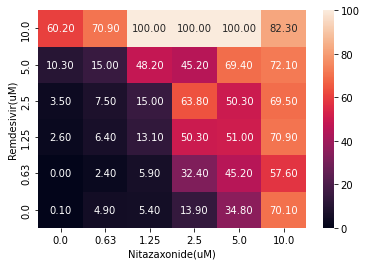

In [47]:
Data_plot = Data_df.pivot('Rem', 'Nit', 'Res')
ax1 = sns.heatmap(Data_plot, vmin =0, vmax = 100, annot = True, fmt = '0.2f')
ax1.invert_yaxis()
plt.ylabel('Remdesivir(uM)')
plt.xlabel('Nitazaxonide(uM)')

## Model A:
#### Remdesivir downstream
#### Nitozaxonide upstream

In [48]:
Rem = Data_df.Rem.unique()
Nit = Data_df.Nit.unique()
UpstreamRes = np.asarray(Data_df[Data_df.Rem==0].Res/100)
Downstream_Isol = np.asarray(Data_df[Data_df.Nit==0].Res/100)
Downstream_Res=[]


In [49]:
PDModel.set_param_hint('E_base', value=0, vary = False)
PDModel.set_param_hint('E_max', value=0.5, min=0, max=1)
PDModel.set_param_hint('IC50', value=10, min=0, max=np.inf)
PDModel.set_param_hint('Hill_Coeff', value=3, min=0, max=np.inf)
params = PDModel.make_params()

In [50]:
result_Nit= PDModel.fit(UpstreamRes, params, Conc=Nit)
result_Rem_Isol = PDModel.fit(Downstream_Isol, params, Conc=Rem)

In [51]:
result_Nit

In [52]:
np.sum((result_Nit.best_fit-UpstreamRes)**2)

0.0022881755038693225

In [69]:
for i in range(0,6):
    if i==0:
        E_N = result_Nit.best_fit
        E_R_Isol = result_Rem_Isol.best_fit
    else:
        E_N = np.vstack((E_N,result_Nit.best_fit))
        E_R_Isol = np.vstack((E_R_Isol,result_Rem_Isol.best_fit))

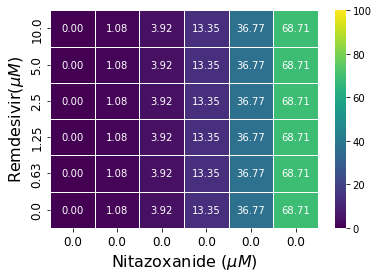

In [70]:
ax1 = sns.heatmap(E_N*100, vmin =0, vmax = 100, annot = True, fmt = '0.2f',cmap ='viridis', linewidth = 1, 
                  yticklabels =Rem , xticklabels =np.zeros(6) )
ax1.invert_yaxis()
ax1.set_ylabel("Remdesivir($\mu M$)", fontsize=16)
ax1.tick_params(axis="y", labelsize = 12)
ax1.set_xlabel('Nitazoxanide ($\mu M$)', fontsize=16)
ax1.tick_params(axis="x", labelsize = 12)

In [53]:
result_Rem_Isol

In [54]:
np.sum((result_Rem_Isol.best_fit-Downstream_Isol)**2)

0.001305714431565753

0.63
0.0012180421713557127
1.25
0.010415908546132151
2.5
0.1064678210626657
5.0
0.03110646961493167
10.0
0.015755504010332516


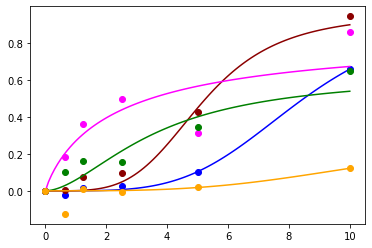

In [71]:
result_Rem=[]
IC50 =[7.936,5.048,5,4.096, 4.096]
Hill = [3.707,3.906,2,1.994, 1.994]
color = ['b', 'darkred', 'magenta', 'green', 'orange']
i=0
Ecombo = result_Rem_Isol.best_fit
E_R = result_Rem_Isol.best_fit
for UpConc in Nit[1:]:
    print(UpConc)
    PDModel.set_param_hint('E_base', value=0, vary = False)
    PDModel.set_param_hint('IC50', value=IC50[i], min=0, max=np.inf)
    PDModel.set_param_hint('Hill_Coeff', value=Hill[i], min=0, max=np.inf)
    PDModel.set_param_hint('E_max', value=1-PDModel.eval(result_Nit.params, Conc = UpConc), min=0, max=1, vary=False)
    params = PDModel.make_params()
    Downstream_Res = (np.asarray(Data_df[Data_df.Nit == UpConc].Res)-
                      np.asarray(Data_df[(Data_df.Rem == 0)&(Data_df.Nit == UpConc)].Res))/100
   # Downstream_Res= (np.asarray(Data_df[Data_df.Rem == UpConc].Res)/100-
   #                   PDModel.eval(result_Rem.params, Conc = UpConc))
    result_Rem.append(PDModel.fit(Downstream_Res, params, Conc=Rem))
    print(np.sum((result_Rem[-1].best_fit-Downstream_Res)**2))
    Ecombo = np.vstack((Ecombo, PDModel.eval(result_Rem[i].params, Conc = Rem)+PDModel.eval(result_Nit.params, Conc = UpConc)))
    E_R = np.vstack((E_R,result_Rem[-1].best_fit ))
    plt.plot(Rem, Downstream_Res, 'o', color = color[i])
    plt.plot(np.linspace(Rem[0],Rem[-1], 100), 
             PDModel.eval(result_Rem[i].params, Conc = np.linspace(Rem[0],Rem[-1], 100)),  color = color[i])
    i=i+1

In [57]:
result_Rem[4]

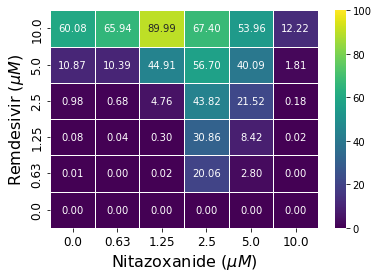

In [72]:
ax1 = sns.heatmap(E_R.T*100, vmin =0, vmax = 100, annot = True, fmt = '0.2f',cmap ='viridis', linewidth = 1, 
                  yticklabels = Rem, xticklabels =Nit)
ax1.invert_yaxis()
ax1.set_ylabel("Remdesivir ($\mu M$)", fontsize=16)
ax1.tick_params(axis="y", labelsize = 12)
ax1.set_xlabel('Nitazoxanide ($\mu M$)', fontsize=16)
ax1.tick_params(axis="x", labelsize = 12)

In [75]:
Ecombo*100

array([[0.00000000e+00, 6.66864344e-03, 7.99250735e-02, 9.77854148e-01,
        1.08665999e+01, 6.00813954e+01],
       [1.08473800e+00, 1.08716869e+00, 1.12478348e+00, 1.76220405e+00,
        1.14790973e+01, 6.70214059e+01],
       [3.91862533e+00, 3.93687761e+00, 4.21521862e+00, 8.67894523e+00,
        4.88258533e+01, 9.39084561e+01],
       [1.33459670e+01, 3.34027889e+01, 4.42070052e+01, 5.71680948e+01,
        7.00411616e+01, 8.07452189e+01],
       [3.67730811e+01, 3.95747626e+01, 4.51914755e+01, 5.82923326e+01,
        7.68668249e+01, 9.07318954e+01],
       [6.87139775e+01, 6.87156986e+01, 6.87314940e+01, 6.88962503e+01,
        7.05211030e+01, 8.09379898e+01]])

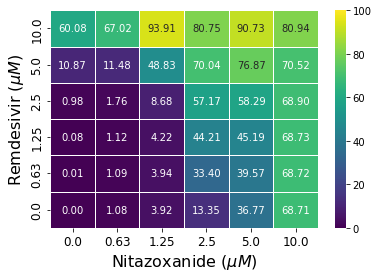

In [76]:
ax = sns.heatmap(Ecombo.T*100, vmin =0, vmax = 100, annot = True, fmt = '.2f', cmap ='viridis', linewidth = 1,
                 yticklabels = Rem, xticklabels = Nit)
ax.invert_yaxis()

ax.set_ylabel("Remdesivir ($\mu M$)", fontsize=16)
ax.tick_params(axis="y", labelsize = 12)
ax.set_xlabel('Nitazoxanide ($\mu M$)', fontsize=16)
ax.tick_params(axis="x", labelsize = 12)

In [77]:
Data_array= np.asarray(Data_plot)
Data_array

array([[  0.1,   4.9,   5.4,  13.9,  34.8,  70.1],
       [  0. ,   2.4,   5.9,  32.4,  45.2,  57.6],
       [  2.6,   6.4,  13.1,  50.3,  51. ,  70.9],
       [  3.5,   7.5,  15. ,  63.8,  50.3,  69.5],
       [ 10.3,  15. ,  48.2,  45.2,  69.4,  72.1],
       [ 60.2,  70.9, 100. , 100. , 100. ,  82.3]])

In [78]:
np.sum((Data_array-Ecombo.T*100)**2)

1759.9171962077087

In [79]:
np.sum((Data_array-np.mean(Data_array))**2)

36641.47

In [80]:
1-np.sum((Data_array-Ecombo.T*100)**2)/np.sum((Data_array-np.mean(Data_array))**2)

0.9519692524287997

In [81]:
delta_E = Ecombo.T*100-np.minimum(100,(E_R_Isol.T*100+E_N*100))

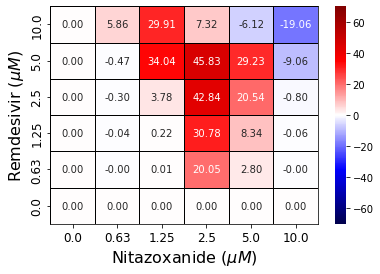

In [82]:
ax = sns.heatmap(delta_E, vmin =-70, vmax = 70, annot = True, fmt = '.2f', cmap ='seismic', linewidth = 0.5, 
                 linecolor = 'k', yticklabels = Rem, xticklabels = Nit)
ax.invert_yaxis()
ax.set_ylabel("Remdesivir ($\mu M$)", fontsize=16)
ax.tick_params(axis="y", labelsize = 12)
ax.set_xlabel('Nitazoxanide ($\mu M$)', fontsize=16)
ax.tick_params(axis="x", labelsize = 12)
for _, spine in ax.spines.items(): 
    spine.set_visible(True) 
    spine.set_linewidth(0.75)

In [90]:
IC50_Rem = [8.934]
IC50_Rem_err = [9.59]
Hill_Rem = [3.623]
Hill_Rem_err = [3.35]
for i in range(0,len(Rem[1:])):
    IC50_Rem.append(result_Rem[i].params['IC50'].value)
    IC50_Rem_err.append(result_Rem[i].params['IC50'].stderr)
    Hill_Rem.append(result_Rem[i].params['Hill_Coeff'].value)
    Hill_Rem_err.append(result_Rem[i].params['Hill_Coeff'].stderr)

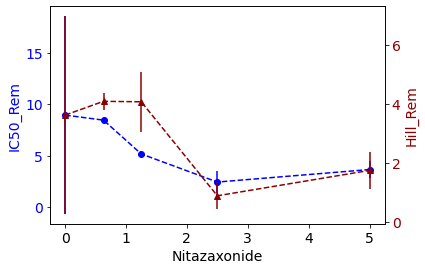

In [92]:
fig, ax1 = plt.subplots(figsize=(6, 4))
ax2 = ax1.twinx() 
ax1.errorbar(Nit[0:5], IC50_Rem[0:5], yerr = IC50_Rem_err[0:5], fmt =  '--o', color = 'b')
ax1.set_ylabel("IC50_Rem", color='b', fontsize=14)
ax1.tick_params(axis="y", labelcolor='b',labelsize = 14)
ax1.set_xlabel('Nitazaxonide', fontsize=14)
ax1.tick_params(axis="x", labelsize = 14)
ax2.errorbar(Nit[0:5], Hill_Rem[0:5], yerr = Hill_Rem_err[0:5], fmt = '--^', color = 'darkred')
ax2.set_ylabel("Hill_Rem", color='darkred', fontsize=14)
ax2.tick_params(axis="y", labelcolor='darkred', labelsize = 14)

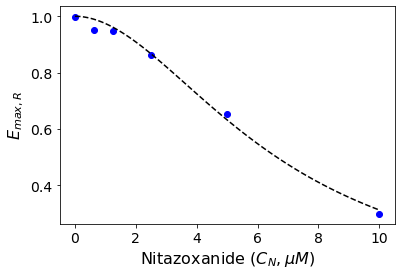

In [83]:
fig, ax1 = plt.subplots(figsize=(6, 4))
ax1.plot(Nit, 1-np.asarray(Data_df[(Data_df.Rem == 0)].Res)/100, 'o', color = 'b')
ax1.plot(np.linspace(Nit[0], Nit[-1], 100), 
         1-PDModel.eval(result_Nit.params, Conc = np.linspace(Nit[0], Nit[-1], 100)), '--', color = 'k')
ax1.set_ylabel("$E_{max,R}$", fontsize=16)
ax1.tick_params(axis="y", labelsize = 14)
ax1.set_xlabel('Nitazoxanide ($C_N, \mu M$)', fontsize=16)
ax1.tick_params(axis="x", labelsize = 14)

In [84]:
from sklearn.metrics import r2_score
r2_score(1-np.asarray(Data_df[(Data_df.Rem == 0)].Res)/100, 1-PDModel.eval(result_Nit.params, Conc = Nit))

0.9936250682470208

In [93]:
def exp(x, a, b, c):
    return a*np.exp(-b*(x))+c
exp_model = Model(exp)

exp_model.set_param_hint('a', value=9, min = 0, max = np.inf)
exp_model.set_param_hint('b', value=2, min=0, max=np.inf)
exp_model.set_param_hint('c', value=2.5, min=0, max=np.inf)




params = exp_model.make_params()

IC50_R = exp_model.fit(IC50_Rem[0:5], params, x = Nit[0:5], weights = 1.0/np.asarray(IC50_Rem_err[0:5]))

In [94]:
IC50_R

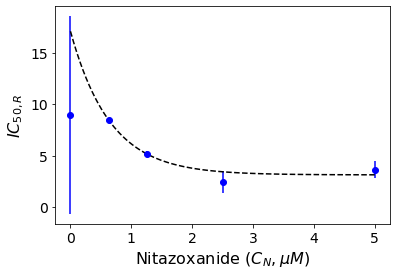

In [95]:
fig, ax1 = plt.subplots(figsize=(6, 4))
ax1.errorbar(Nit[0:5], IC50_Rem[0:5], yerr = IC50_Rem_err[0:5], fmt =  'o', color = 'b')
ax1.plot(np.linspace(Nit[0], Nit[4], 100), 
         exp_model.eval(IC50_R.params, x=np.linspace(Nit[0], Nit[4], 100)), '--', color = 'k')
ax1.set_ylabel("$IC_{50,R}$", fontsize=16)
ax1.tick_params(axis="y", labelsize = 14)
ax1.set_xlabel('Nitazoxanide ($C_N, \mu M$)', fontsize=16)
ax1.tick_params(axis="x", labelsize = 14)

In [96]:
r2_score(IC50_Rem[0:5], exp_model.eval(IC50_R.params, x=Nit[0:5]), 
         sample_weight= 1.0/np.asarray(IC50_Rem_err[0:5]))

0.8577415032676077

In [100]:
def binomial (x, a, b, c, d):
    return a*x**3+b*(x**2)+c*x+d

binomial_model = Model(binomial)

binomial_model.set_param_hint('a', value=0.5, min = 0, max = np.inf)
binomial_model.set_param_hint('b', value=-5, min=-np.inf, max=0)
#sigmoidal_model.set_param_hint('c', value=8, min=5, max=np.inf)
binomial_model.set_param_hint('c', value=2, min=0, max=np.inf)
binomial_model.set_param_hint('d', value=3.545, min=0, max=np.inf)
params = binomial_model.make_params()

Hill_R = binomial_model.fit(Hill_Rem[0:5], params, x= Nit[0:5], weights = 1.0/np.asarray(Hill_Rem_err[0:5]))

In [101]:
Hill_R

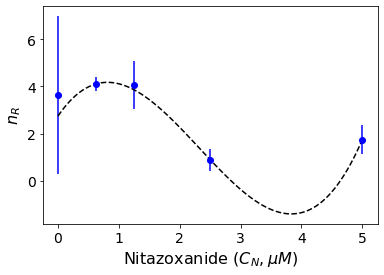

In [102]:
fig, ax1 = plt.subplots(figsize=(6, 4))
ax1.errorbar(Nit[0:5], Hill_Rem[0:5], yerr = Hill_Rem_err[0:5], fmt =  'o', color = 'b')
ax1.plot(np.linspace(Nit[0], Nit[4], 100), 
         binomial_model.eval(Hill_R.params, x=np.linspace(Nit[0], Nit[4], 100)), '--', color = 'k')
ax1.set_ylabel("$n_{R}$", fontsize=16)
ax1.tick_params(axis="y", labelsize = 14)
ax1.set_xlabel('Nitazoxanide ($C_N, \mu M$)', fontsize=16)
ax1.tick_params(axis="x", labelsize = 14)

In [103]:
r2_score(Hill_Rem[0:5], binomial_model.eval(Hill_R.params, x=Nit[0:5]), 
         sample_weight= 1.0/np.asarray(Hill_Rem_err[0:5]))

0.9838679910919602